# Project: Soccer in the EU

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

%matplotlib inline
import pandas as pd
import sqlite3 as sql
import matplotlib
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Create connection to database file
cnx = sql.connect(r'C:\Users\Ray\OneDrive\documents\012 udacity\DAND\data\soccer\database.sqlite')

In [3]:
# import all tables from tables

df_country = pd.read_sql_query("SELECT * FROM Country", cnx)
df_league = pd.read_sql_query("SELECT * FROM League", cnx)
df_match = pd.read_sql_query("SELECT * FROM Match", cnx)
df_player = pd.read_sql_query("SELECT * FROM Player", cnx)
df_player_att = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)
df_sqlite_sq = pd.read_sql_query("SELECT * FROM sqlite_sequence", cnx)
df_team = pd.read_sql_query("SELECT * FROM Team", cnx)
df_team_att = pd.read_sql_query("SELECT * FROM Team_Attributes", cnx)

In [4]:
#See data structure of df_team
df_team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [5]:
#See data structure of df_team_att
df_team_att.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

In [6]:
#See data structure of df_match
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [7]:
#List all column values in df_match
list(df_match.columns.values)

['id',
 'country_id',
 'league_id',
 'season',
 'stage',
 'date',
 'match_api_id',
 'home_team_api_id',
 'away_team_api_id',
 'home_team_goal',
 'away_team_goal',
 'home_player_X1',
 'home_player_X2',
 'home_player_X3',
 'home_player_X4',
 'home_player_X5',
 'home_player_X6',
 'home_player_X7',
 'home_player_X8',
 'home_player_X9',
 'home_player_X10',
 'home_player_X11',
 'away_player_X1',
 'away_player_X2',
 'away_player_X3',
 'away_player_X4',
 'away_player_X5',
 'away_player_X6',
 'away_player_X7',
 'away_player_X8',
 'away_player_X9',
 'away_player_X10',
 'away_player_X11',
 'home_player_Y1',
 'home_player_Y2',
 'home_player_Y3',
 'home_player_Y4',
 'home_player_Y5',
 'home_player_Y6',
 'home_player_Y7',
 'home_player_Y8',
 'home_player_Y9',
 'home_player_Y10',
 'home_player_Y11',
 'away_player_Y1',
 'away_player_Y2',
 'away_player_Y3',
 'away_player_Y4',
 'away_player_Y5',
 'away_player_Y6',
 'away_player_Y7',
 'away_player_Y8',
 'away_player_Y9',
 'away_player_Y10',
 'away_player

<a id='eda'></a>
## Exploratory Data Analysis

In [8]:
#Merge df_match with df_team to get the names of the home_team based on home_team_api_id
df_match_team = pd.merge(df_match, df_team, how='inner', left_on='home_team_api_id', right_on='team_api_id',
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

In [9]:
#Check if merge was successful List all column values in df_match_team
list(df_match_team.columns.values)

['id_x',
 'country_id',
 'league_id',
 'season',
 'stage',
 'date',
 'match_api_id',
 'home_team_api_id',
 'away_team_api_id',
 'home_team_goal',
 'away_team_goal',
 'home_player_X1',
 'home_player_X2',
 'home_player_X3',
 'home_player_X4',
 'home_player_X5',
 'home_player_X6',
 'home_player_X7',
 'home_player_X8',
 'home_player_X9',
 'home_player_X10',
 'home_player_X11',
 'away_player_X1',
 'away_player_X2',
 'away_player_X3',
 'away_player_X4',
 'away_player_X5',
 'away_player_X6',
 'away_player_X7',
 'away_player_X8',
 'away_player_X9',
 'away_player_X10',
 'away_player_X11',
 'home_player_Y1',
 'home_player_Y2',
 'home_player_Y3',
 'home_player_Y4',
 'home_player_Y5',
 'home_player_Y6',
 'home_player_Y7',
 'home_player_Y8',
 'home_player_Y9',
 'home_player_Y10',
 'home_player_Y11',
 'away_player_Y1',
 'away_player_Y2',
 'away_player_Y3',
 'away_player_Y4',
 'away_player_Y5',
 'away_player_Y6',
 'away_player_Y7',
 'away_player_Y8',
 'away_player_Y9',
 'away_player_Y10',
 'away_play

In [10]:
#Rename columns to add "home_" prefix
df_match_team.rename(columns={'team_api_id': 'home_team_api_id_y', 
                              'team_fifa_api_id': 'home_team_fifa_api_id', 
                              'team_long_name': 'home_team_long_name', 
                              'team_short_name': 'home_team_short_name'}, inplace=True)

In [11]:
#Check if rename was successful
list(df_match_team.columns.values)

['id_x',
 'country_id',
 'league_id',
 'season',
 'stage',
 'date',
 'match_api_id',
 'home_team_api_id',
 'away_team_api_id',
 'home_team_goal',
 'away_team_goal',
 'home_player_X1',
 'home_player_X2',
 'home_player_X3',
 'home_player_X4',
 'home_player_X5',
 'home_player_X6',
 'home_player_X7',
 'home_player_X8',
 'home_player_X9',
 'home_player_X10',
 'home_player_X11',
 'away_player_X1',
 'away_player_X2',
 'away_player_X3',
 'away_player_X4',
 'away_player_X5',
 'away_player_X6',
 'away_player_X7',
 'away_player_X8',
 'away_player_X9',
 'away_player_X10',
 'away_player_X11',
 'home_player_Y1',
 'home_player_Y2',
 'home_player_Y3',
 'home_player_Y4',
 'home_player_Y5',
 'home_player_Y6',
 'home_player_Y7',
 'home_player_Y8',
 'home_player_Y9',
 'home_player_Y10',
 'home_player_Y11',
 'away_player_Y1',
 'away_player_Y2',
 'away_player_Y3',
 'away_player_Y4',
 'away_player_Y5',
 'away_player_Y6',
 'away_player_Y7',
 'away_player_Y8',
 'away_player_Y9',
 'away_player_Y10',
 'away_play

In [12]:
#Merge df_match with df_team to get the names of the away_team based on away_team_api_id
df_match_team = pd.merge(df_match_team, df_team, how='inner', left_on='away_team_api_id', right_on='team_api_id',
         left_index=False, right_index=False, sort=True,
         suffixes=('_a', '_b'), copy=True, indicator=False,
         validate=None)

In [13]:
#Check if merge was successful List all column values in df_match_team
list(df_match_team.columns.values)

['id_x',
 'country_id',
 'league_id',
 'season',
 'stage',
 'date',
 'match_api_id',
 'home_team_api_id',
 'away_team_api_id',
 'home_team_goal',
 'away_team_goal',
 'home_player_X1',
 'home_player_X2',
 'home_player_X3',
 'home_player_X4',
 'home_player_X5',
 'home_player_X6',
 'home_player_X7',
 'home_player_X8',
 'home_player_X9',
 'home_player_X10',
 'home_player_X11',
 'away_player_X1',
 'away_player_X2',
 'away_player_X3',
 'away_player_X4',
 'away_player_X5',
 'away_player_X6',
 'away_player_X7',
 'away_player_X8',
 'away_player_X9',
 'away_player_X10',
 'away_player_X11',
 'home_player_Y1',
 'home_player_Y2',
 'home_player_Y3',
 'home_player_Y4',
 'home_player_Y5',
 'home_player_Y6',
 'home_player_Y7',
 'home_player_Y8',
 'home_player_Y9',
 'home_player_Y10',
 'home_player_Y11',
 'away_player_Y1',
 'away_player_Y2',
 'away_player_Y3',
 'away_player_Y4',
 'away_player_Y5',
 'away_player_Y6',
 'away_player_Y7',
 'away_player_Y8',
 'away_player_Y9',
 'away_player_Y10',
 'away_play

In [14]:
#Rename columns to add "away_" prefix
df_match_team.rename(columns={'team_api_id': 'away_team_api_id_y', 
                              'team_fifa_api_id': 'away_team_fifa_api_id', 
                              'team_long_name': 'away_team_long_name', 
                              'team_short_name': 'away_team_short_name'}, inplace=True)

In [15]:
#Check if merge was successful List all column values in df_match_team
list(df_match_team.columns.values)

['id_x',
 'country_id',
 'league_id',
 'season',
 'stage',
 'date',
 'match_api_id',
 'home_team_api_id',
 'away_team_api_id',
 'home_team_goal',
 'away_team_goal',
 'home_player_X1',
 'home_player_X2',
 'home_player_X3',
 'home_player_X4',
 'home_player_X5',
 'home_player_X6',
 'home_player_X7',
 'home_player_X8',
 'home_player_X9',
 'home_player_X10',
 'home_player_X11',
 'away_player_X1',
 'away_player_X2',
 'away_player_X3',
 'away_player_X4',
 'away_player_X5',
 'away_player_X6',
 'away_player_X7',
 'away_player_X8',
 'away_player_X9',
 'away_player_X10',
 'away_player_X11',
 'home_player_Y1',
 'home_player_Y2',
 'home_player_Y3',
 'home_player_Y4',
 'home_player_Y5',
 'home_player_Y6',
 'home_player_Y7',
 'home_player_Y8',
 'home_player_Y9',
 'home_player_Y10',
 'home_player_Y11',
 'away_player_Y1',
 'away_player_Y2',
 'away_player_Y3',
 'away_player_Y4',
 'away_player_Y5',
 'away_player_Y6',
 'away_player_Y7',
 'away_player_Y8',
 'away_player_Y9',
 'away_player_Y10',
 'away_play

In [16]:
def winner(x):

    if (x['home_team_goal']==x['away_team_goal']):
        return 'Draw'
    elif (x['home_team_goal']>x['away_team_goal']):
        return 'Home'
    elif (x['home_team_goal']<x['away_team_goal']):
        return 'Away'
    
df_match_team['winner'] = df_match_team.apply(winner, axis = 1)

In [17]:
df_match_team.head()

,id_x,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,home_team_api_id_y,home_team_fifa_api_id,home_team_long_name,home_team_short_name,id,away_team_api_id_y,away_team_fifa_api_id,away_team_long_name,away_team_short_name,winner
0,15851,15722,15722,2008/2009,24,2009-04-19 00:00:00,506710,1957,1601,1,...,1957,110745.0,Jagiellonia Białystok,BIA,31446,1601,874.0,Ruch Chorzów,CHO,Home
1,16129,15722,15722,2009/2010,28,2010-05-07 00:00:00,674877,1957,1601,1,...,1957,110745.0,Jagiellonia Białystok,BIA,31446,1601,874.0,Ruch Chorzów,CHO,Home
2,16393,15722,15722,2010/2011,30,2011-05-29 00:00:00,838870,1957,1601,2,...,1957,110745.0,Jagiellonia Białystok,BIA,31446,1601,874.0,Ruch Chorzów,CHO,Home
3,16540,15722,15722,2011/2012,20,2012-03-04 00:00:00,1031145,1957,1601,0,...,1957,110745.0,Jagiellonia Białystok,BIA,31446,1601,874.0,Ruch Chorzów,CHO,Away
4,16866,15722,15722,2012/2013,30,2013-06-02 00:00:00,1219283,1957,1601,1,...,1957,110745.0,Jagiellonia Białystok,BIA,31446,1601,874.0,Ruch Chorzów,CHO,Home


In [18]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
# homegoals = df_match[home_team_goal].plot(kind="bar")
# df_match_2008 = df_match[(df_match['date'] > '2008-01-01') & (df_match['date'] < '2009-01-02')]
# df_match_2008.head()

In [19]:
df_match.season.unique()

array(['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013',
       '2013/2014', '2014/2015', '2015/2016'], dtype=object)

In [20]:
df_match_group = df_match_team.groupby(['home_team_api_id', 'season'])['home_team_goal'].sum()
df_match_group.head()

home_team_api_id  season   
1601              2008/2009    13
                  2009/2010    22
                  2010/2011    14
                  2011/2012    24
                  2012/2013    17
Name: home_team_goal, dtype: int64

# Home Ground Advantage

Do teams win more games when they play on their home ground?

In [21]:
df_match_group_home = df_match_team.groupby(['home_team_long_name', 'season', 'winner'], as_index=False)['home_team_goal'].sum()
df_match_group_away = df_match_team.groupby(['home_team_long_name', 'season', 'winner'], as_index=False)['home_team_goal'].sum()


In [22]:
df_match_2015 = df_match_team[(df_match_team['season'] == '2014/2015')]
df_match_2016 = df_match_team[(df_match_team['season'] == '2015/2016')]

df_match_group_home_2015 = df_match_2015.groupby(['home_team_long_name', 'season', 'winner'], as_index=False)['home_team_goal'].sum()
df_match_group_home_2016 = df_match_2016.groupby(['home_team_long_name', 'season', 'winner'], as_index=False)['home_team_goal'].sum()
df_match_group_away_2015 = df_match_2015.groupby(['away_team_long_name', 'season', 'winner'], as_index=False)['away_team_goal'].sum()
df_match_group_away_2016 = df_match_2016.groupby(['away_team_long_name', 'season', 'winner'], as_index=False)['away_team_goal'].sum()

In [23]:
#Groupby to count how many times a home team wins, loses or draw at a home game
df_match_group_home_1 = df_match_team.groupby(['home_team_long_name', 'season', 'winner'], as_index=False).agg('count')

#Groupby to count how many times a away team wins, loses or draw at an away game
df_match_group_away_1 = df_match_team.groupby(['away_team_long_name', 'season', 'winner'], as_index=False).agg('count')

#Only keep the relevant columns
col_list_home = ['home_team_long_name', 'season', 'winner', 'match_api_id']
col_list_away = ['away_team_long_name', 'season', 'winner', 'match_api_id']

#This show the number of times the home team win, lose or draw when they play a home game
df_match_group_home_1 = df_match_group_home_1[col_list_home]

#This show the number of times the away team win, lose or draw when they play an away game
df_match_group_away_1 = df_match_group_away_1[col_list_away]

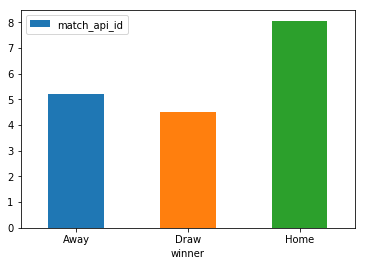

In [24]:
#Groupby to count how many times a home team wins, loses or draw at a home game
df_match_group_home_2 = df_match_group_home_1.groupby(['winner'], as_index=False).agg('mean')
ax = df_match_group_home_2.plot.bar(x='winner', y='match_api_id', rot=0)

## What teams improved the most over the last 12 months?

In [25]:
#Get results for 2014/2015 and 2015/2016
df_match_2015_2016 = df_match_team[(df_match_team['season'] == '2014/2015') | (df_match_team['season'] == '2015/2016')]
df_match_group_home_2015_2016 = df_match_2015_2016.groupby(['home_team_long_name', 'season', 'winner'], as_index=False)['home_team_goal'].sum()
df_match_group_home_2015_2016.head()

,home_team_long_name,season,winner,home_team_goal
0,1. FC Köln,2014/2015,Away,2
1,1. FC Köln,2014/2015,Draw,5
2,1. FC Köln,2014/2015,Home,11
3,1. FC Köln,2015/2016,Away,2
4,1. FC Köln,2015/2016,Draw,2


In [26]:
df_match_2015_home_1 = df_match_group_home_1[(df_match_group_home_1['season'] == '2014/2015') & (df_match_group_home_1['winner'] == 'Home')]
df_match_2015_away_1 = df_match_group_away_1[(df_match_group_away_1['season'] == '2014/2015') & (df_match_group_away_1['winner'] == 'Away')]

df_match_2016_home_1 = df_match_group_home_1[(df_match_group_home_1['season'] == '2015/2016') & (df_match_group_home_1['winner'] == 'Home')]
df_match_2016_away_1 = df_match_group_away_1[(df_match_group_away_1['season'] == '2015/2016') & (df_match_group_away_1['winner'] == 'Away')]

In [27]:
df_match_2016_home_1.head()

,home_team_long_name,season,winner,match_api_id
23,1. FC Köln,2015/2016,Home,5
59,1. FSV Mainz 05,2015/2016,Home,8
104,ADO Den Haag,2015/2016,Home,4
134,AS Monaco,2015/2016,Home,10
173,AS Saint-Étienne,2015/2016,Home,10


In [28]:
df_match_2015_away_1.head()

,away_team_long_name,season,winner,match_api_id
18,1. FC Köln,2014/2015,Away,5
54,1. FSV Mainz 05,2014/2015,Away,3
99,ADO Den Haag,2014/2015,Away,1
129,AS Monaco,2014/2015,Away,12
168,AS Saint-Étienne,2014/2015,Away,7


In [29]:
df_match_2015_summary = pd.merge(df_match_2015_home_1, df_match_2015_away_1, how='inner', left_on='home_team_long_name', right_on='away_team_long_name',
         left_index=False, right_index=False, sort=True,
         suffixes=('_a', '_b'), copy=True, indicator=False,
         validate=None)

df_match_2016_summary = pd.merge(df_match_2016_home_1, df_match_2016_away_1, how='inner', left_on='home_team_long_name', right_on='away_team_long_name',
         left_index=False, right_index=False, sort=True,
         suffixes=('_a', '_b'), copy=True, indicator=False,
         validate=None)

#Rename columns to shorten
df_match_2015_summary.rename(columns={'home_team_long_name': 'team', 
                              'season_a': 'season', 
                              'match_api_id_a': 'matches_won_at_home', 
                              'match_api_id_b': 'matches_won_at_away'}, inplace=True)

df_match_2016_summary.rename(columns={'home_team_long_name': 'team', 
                              'season_a': 'season', 
                              'match_api_id_a': 'matches_won_at_home', 
                              'match_api_id_b': 'matches_won_at_away'}, inplace=True)

In [30]:
#Add calculated column to sum matches won at home and away
def matches(x): return x['matches_won_at_home'] + x['matches_won_at_away']

df_match_2015_summary['total_matches_won'] = df_match_2015_summary.apply(matches, axis = 1)
df_match_2016_summary['total_matches_won'] = df_match_2016_summary.apply(matches, axis = 1)

In [31]:
col_list = ['team', 'season', 'total_matches_won']

df_match_2015_summary = df_match_2015_summary[col_list]
df_match_2016_summary = df_match_2016_summary[col_list]

df_match_2015_2016_summary = pd.merge(df_match_2015_summary, df_match_2016_summary, how='inner', left_on='team', right_on='team',
         left_index=False, right_index=False, sort=True,
         suffixes=('_a', '_b'), copy=True, indicator=False,
         validate=None)

In [32]:
#Add calculated column to see the difference between one season to the other
def season_changes(x): return x['total_matches_won_b'] - x['total_matches_won_a']
df_match_2015_2016_summary['season_changes'] = df_match_2015_2016_summary.apply(season_changes, axis = 1)

In [33]:
df_match_2015_2016_summary = df_match_2015_2016_summary.sort_values(by='season_changes', ascending=False)
df_match_2015_2016_summary.head(10)

,team,season_a,total_matches_won_a,season_b,total_matches_won_b,season_changes
85,Leicester City,2014/2015,11,2015/2016,23,12
16,Borussia Dortmund,2014/2015,13,2015/2016,24,11
95,Napoli,2014/2015,18,2015/2016,25,7
105,Piast Gliwice,2014/2015,11,2015/2016,17,6
103,Paris Saint-Germain,2014/2015,24,2015/2016,30,6
68,Inter,2014/2015,14,2015/2016,20,6
35,FC Arouca,2014/2015,7,2015/2016,13,6
67,Hertha BSC Berlin,2014/2015,9,2015/2016,14,5
133,Sporting CP,2014/2015,22,2015/2016,27,5
97,OGC Nice,2014/2015,13,2015/2016,18,5


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

## Conclusion 1: Home Ground Advantage is significant enough factor to consider in soccer, but not definitive.
On Average, teams win more games when they play at home.
However, the home ground advantage does not give home teams the definite win. 
The sum of the average number of matches where the home team loss or has got a draw (9.6) at home is greater than the average number of matches won at home (8.1).

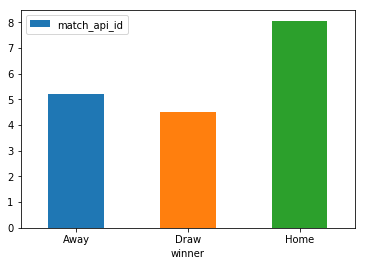

In [34]:
ax = df_match_group_home_2.plot.bar(x='winner', y='match_api_id', rot=0)

In [35]:
df_match_group_home_2

,winner,match_api_id
0,Away,5.217331
1,Draw,4.530220
2,Home,8.068382


## Conclusion 2: Lech Poznań improved the most in the 2015/2016 season.
On Average, teams win more games when they play at home.
However, the home ground advantage does not give home teams the definite win. 
The sum of the average number of matches where the home team loss or has got a draw (9.6) at home is greater than the average number of matches won at home (8.1).

In [36]:
top_10 = df_match_2015_2016_summary.head(10)
top_10

,team,season_a,total_matches_won_a,season_b,total_matches_won_b,season_changes
85,Leicester City,2014/2015,11,2015/2016,23,12
16,Borussia Dortmund,2014/2015,13,2015/2016,24,11
95,Napoli,2014/2015,18,2015/2016,25,7
105,Piast Gliwice,2014/2015,11,2015/2016,17,6
103,Paris Saint-Germain,2014/2015,24,2015/2016,30,6
68,Inter,2014/2015,14,2015/2016,20,6
35,FC Arouca,2014/2015,7,2015/2016,13,6
67,Hertha BSC Berlin,2014/2015,9,2015/2016,14,5
133,Sporting CP,2014/2015,22,2015/2016,27,5
97,OGC Nice,2014/2015,13,2015/2016,18,5


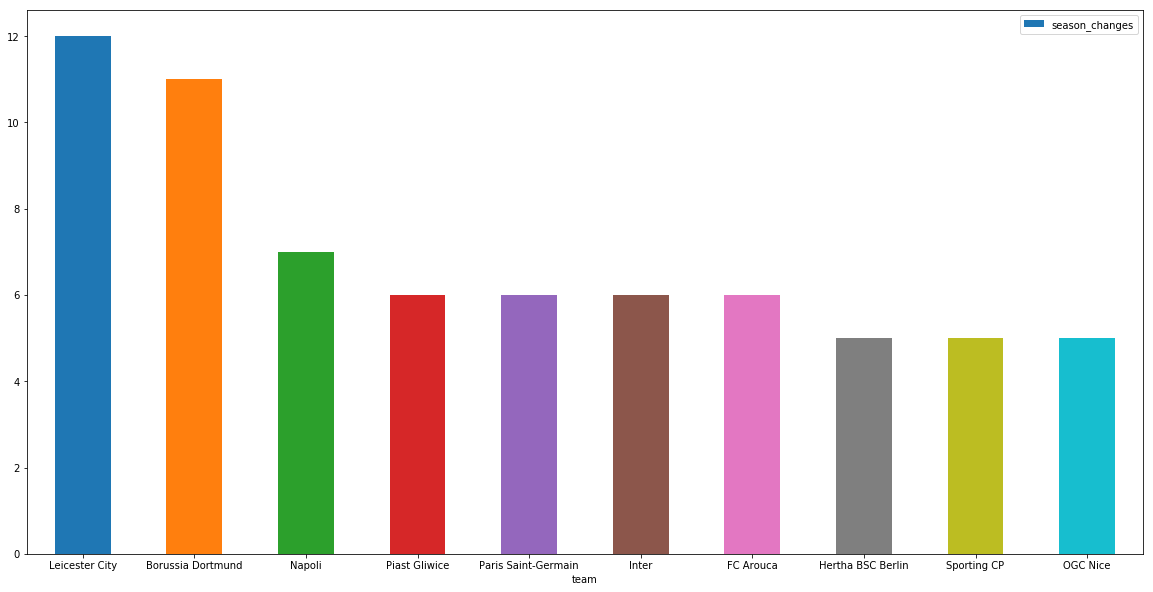

In [37]:
top_10_ax = top_10.plot.bar(x='team', y='season_changes', rot=0, figsize=(20,10))